# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [2]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U 
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

     |████████████████████████████████| 1.7 MB 17.6 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     |████████████████████████████████| 953 kB 25.5 MB/s            
  Attempting uninstall: wheel
    Found existing installation: wheel 0.37.0
    Uninstalling wheel-0.37.0:
      Successfully uninstalled wheel-0.37.0
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


ERROR: You must give at least one requirement to install (see "pip help install")
     |████████████████████████████████| 47.3 MB 1.6 MB/s             
     |████████████████████████████████| 8.6 MB 49.7 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080040 sha256=6d7a9470b067b2fe89d314ce7dd27071932513e80559d6e641bfc8728e3c4791
  Stored in directory: /root/.cache/pip/wheels/9f/9e/ac/f24f30e119df73511fde9af8aa747217ac8824e662037ba9a8
Successfully built bokeh
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.3.3
    Uninstalling bokeh-2.3.3:
      Successfully uninstalled bokeh-2.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the fo

### Setup Kaggle API Key

In [3]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "kamaraboumuharam"
kaggle_key = "1e9f6a32bb3f46781ef28cce2a157e09"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [5]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/140k [00:00<?, ?B/s]
100% 140k/140k [00:00<00:00, 52.1MB/s]
  0% 0.00/316k [00:00<?, ?B/s]
100% 316k/316k [00:00<00:00, 98.0MB/s]
  0% 0.00/633k [00:00<?, ?B/s]
100% 633k/633k [00:00<00:00, 88.6MB/s]
unzip:  cannot find or open bike-sharing-demand.zip, bike-sharing-demand.zip.zip or bike-sharing-demand.zip.ZIP.


In [6]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [7]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv")
train.sample(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
5669,2012-01-11 09:00:00,1,0,1,2,8.20,10.605,86,8.9981,7,218,225
4623,2011-11-05 17:00:00,4,0,0,1,15.58,19.695,40,11.0014,100,234,334
10079,2012-11-05 08:00:00,4,0,1,2,12.30,14.395,49,15.0013,19,629,648
6995,2012-04-09 19:00:00,2,0,1,1,21.32,25.000,34,23.9994,35,386,421
1088,2011-03-09 21:00:00,1,0,1,2,13.12,15.150,93,22.0028,10,52,62


In [8]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [11]:
train["datetime"] = pd.to_datetime(train["datetime"])

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [13]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv")
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [15]:
test["datetime"] = pd.to_datetime(test["datetime"])

In [16]:
train["datetime"] = pd.to_datetime(train["datetime"])

In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [18]:
# Same thing as train and test dataset
submission =pd.read_csv("sampleSubmission.csv")
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [19]:
pip install autogluon

In [34]:

learner_kwargs = {'ignored_columns': ignored_columns}
predictor = TabularPredictor(learner_kwargs = learner_kwargs , label="count").fit(train_data=train,presets="best_quality",time_limit=600)

No path specified. Models will be saved in: "AutogluonModels/ag-20220102_182513/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220102_182513/"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 11
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11239.92 MB
	Train Data (Original)  Memory Usage: 0.78 MB (0.0% of avail

[1000]	train_set's rmse: 123.806	valid_set's rmse: 134.369
[2000]	train_set's rmse: 117.412	valid_set's rmse: 133.705


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 123.42	valid_set's rmse: 141.5


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 125.097	valid_set's rmse: 128.797
[2000]	train_set's rmse: 119.003	valid_set's rmse: 127.909
[3000]	train_set's rmse: 114.63	valid_set's rmse: 127.431
[4000]	train_set's rmse: 111.295	valid_set's rmse: 126.943
[5000]	train_set's rmse: 108.576	valid_set's rmse: 126.844
[6000]	train_set's rmse: 106.085	valid_set's rmse: 126.71


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.131	valid_set's rmse: 138.303
[2000]	train_set's rmse: 117.833	valid_set's rmse: 137.535


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.871	valid_set's rmse: 128.052
[2000]	train_set's rmse: 118.547	valid_set's rmse: 127.003
[3000]	train_set's rmse: 114.124	valid_set's rmse: 126.834
[4000]	train_set's rmse: 110.645	valid_set's rmse: 126.694


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.654	valid_set's rmse: 135.095
[2000]	train_set's rmse: 118.764	valid_set's rmse: 133.849
[3000]	train_set's rmse: 114.615	valid_set's rmse: 133.509
[4000]	train_set's rmse: 111.249	valid_set's rmse: 133.472
[5000]	train_set's rmse: 108.455	valid_set's rmse: 133.281


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.01	valid_set's rmse: 139.355
[2000]	train_set's rmse: 117.819	valid_set's rmse: 138.312
[3000]	train_set's rmse: 113.4	valid_set's rmse: 137.886
[4000]	train_set's rmse: 110.032	valid_set's rmse: 137.758


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.47	valid_set's rmse: 135.412


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.18	valid_set's rmse: 137.579
[2000]	train_set's rmse: 117.782	valid_set's rmse: 136.664
[3000]	train_set's rmse: 113.447	valid_set's rmse: 136.246
[4000]	train_set's rmse: 109.982	valid_set's rmse: 136.227


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.641	valid_set's rmse: 132.484


	-134.0883	 = Validation score   (root_mean_squared_error)
	43.44s	 = Training   runtime
	2.6s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 347.78s of the 547.82s of remaining time.
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argu

[1000]	train_set's rmse: 96.0217	valid_set's rmse: 123.249


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 94.7479	valid_set's rmse: 135.635


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 95.3055	valid_set's rmse: 132.087


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 95.1635	valid_set's rmse: 131.521


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	-132.2864	 = Validation score   (root_mean_squared_error)
	12.25s	 = Training   runtime
	0.54s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 333.48s of the 533.52s of remaining time.
	-118.4567	 = Validation score   (root_mean_squared_error)
	7.84s	 = Training   runtime

### Review AutoGluon's training run with ranking of models that did the best.

In [35]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3 -114.937170       7.653020  515.527559                0.000661           0.351012            3       True         19
1   NeuralNetFastAI_BAG_L2 -115.627400       6.721523  482.471948                0.362472         104.599197            2       True         17
2        LightGBMXT_BAG_L2 -116.258037       6.574586  387.338519                0.215535           9.465768            2       True         12
3          CatBoost_BAG_L2 -116.621712       6.405703  404.469729                0.046652          26.596978            2       True         15
4          LightGBM_BAG_L2 -116.912573       6.450167  385.338319                0.091116           7.465568            2       True         13
5           XGBoost_BAG_L2 -117.357834       6.451792  386.395050         

{'leaderboard':                      model   score_val  ...  can_infer  fit_order
 0      WeightedEnsemble_L3 -114.937170  ...       True         19
 1   NeuralNetFastAI_BAG_L2 -115.627400  ...       True         17
 2        LightGBMXT_BAG_L2 -116.258037  ...       True         12
 3          CatBoost_BAG_L2 -116.621712  ...       True         15
 4          LightGBM_BAG_L2 -116.912573  ...       True         13
 5           XGBoost_BAG_L2 -117.357834  ...       True         18
 6     ExtraTreesMSE_BAG_L2 -117.630619  ...       True         16
 7      WeightedEnsemble_L2 -118.428761  ...       True         11
 8   RandomForestMSE_BAG_L1 -118.456660  ...       True          5
 9   RandomForestMSE_BAG_L2 -119.397257  ...       True         14
 10    ExtraTreesMSE_BAG_L1 -128.733445  ...       True          7
 11         LightGBM_BAG_L1 -132.286410  ...       True          4
 12          XGBoost_BAG_L1 -132.308522  ...       True          9
 13         CatBoost_BAG_L1 -132.349692  ...   

### Create predictions from train dataset

In [36]:
predictions_train = predictor.predict(train)
predictions_train.head()

0    18.463163
1    29.414021
2    27.209736
3     6.964040
4     3.973978
Name: count, dtype: float32

## Create predictions from test dataset

In [37]:
predictions_test = predictor.predict(test)
predictions_test.head()

0     96.785080
1     89.702164
2     89.703087
3    105.324028
4    105.325645
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [38]:
# Describe the `predictions` series to see if there are any negative values
predictions_test.describe()

count    6493.000000
mean      210.963654
std       129.470856
min       -10.705084
25%       104.995140
50%       194.516296
75%       299.771790
max       656.350891
Name: count, dtype: float64

In [39]:
# How many negative values do we have?
predictions_test[ predictions_test < 0 ].sum()

-16.007343

In [40]:
# Set them to zero
predictions_test[ predictions_test < 0 ] = 0

### Set predictions to submission dataframe, save, and submit

In [41]:
submission["count"] = predictions_test
submission.to_csv("submission.csv", index=False)

In [42]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 466kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [43]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                      date                 description                        status    publicScore  privateScore  
----------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv                2022-01-02 18:36:58  first raw submission               complete  1.39212      1.39212       
submission.csv                2022-01-01 17:21:56  new features with hyperparameters  complete  0.52224      0.52224       
submission.csv                2022-01-01 17:20:02  new features                       complete  0.46929      0.46929       


#### Initial score of `1.39212 `

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2b10954290>,
      dtype=object)

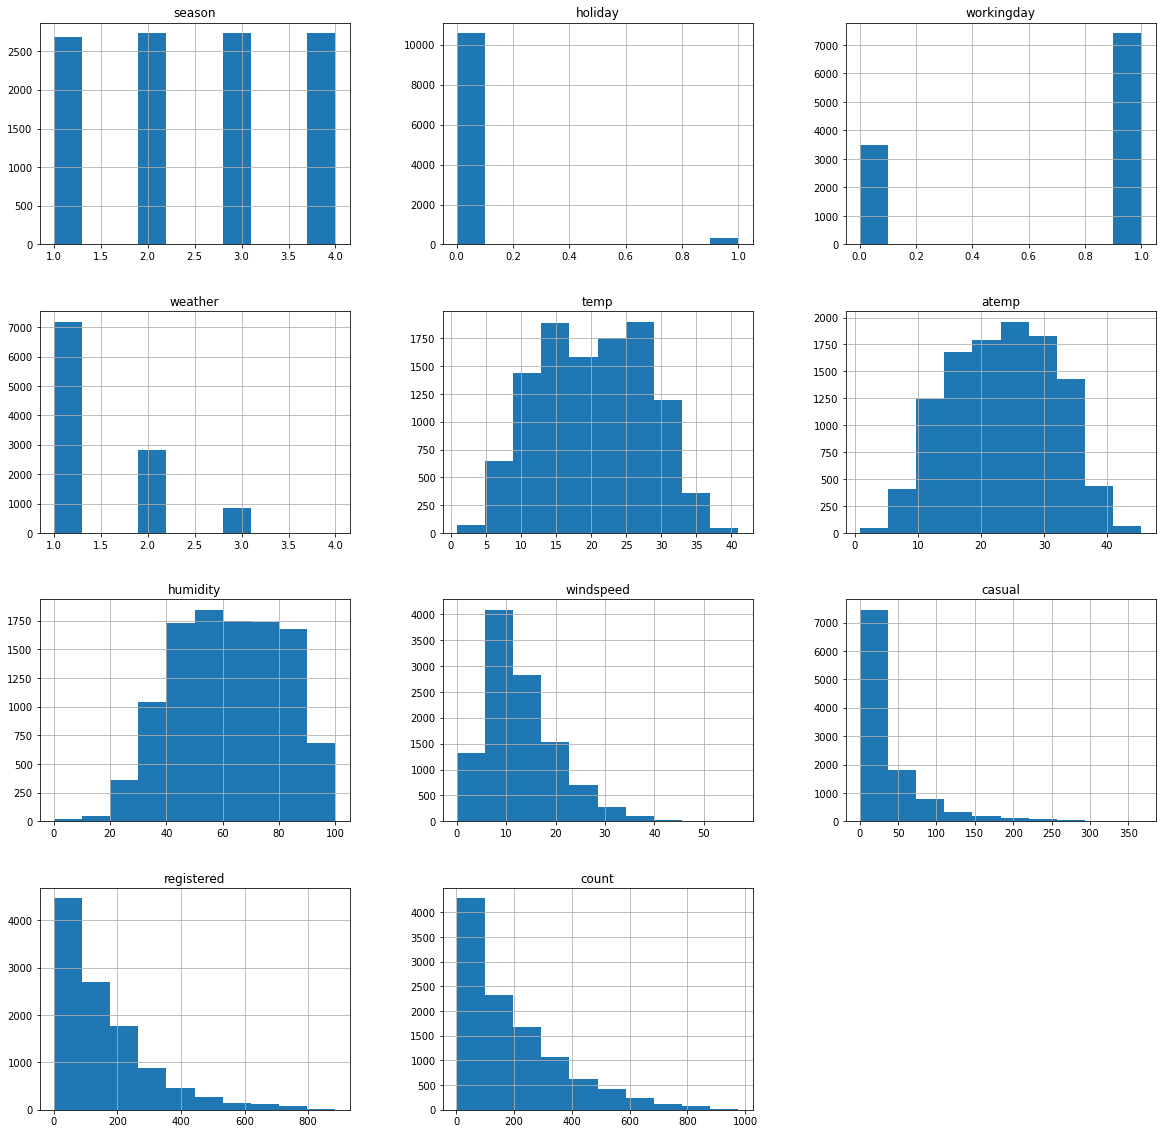

In [44]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(20,20))

In [45]:
# create a new feature
train["month"] = train["datetime"].dt.month
test["month"] = test["datetime"].dt.month
train["year"] = train["datetime"].dt.year
test["year"] = test["datetime"].dt.year
train["day"] = train["datetime"].dt.day
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour
train["hour"] = train["datetime"].dt.hour


In [46]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,year,day,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,1,2011,20,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,2011,20,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,2011,20,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,2011,20,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,2011,20,4


In [47]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
 9   month       6493 non-null   int64         
 10  year        6493 non-null   int64         
 11  day         6493 non-null   int64         
 12  hour        6493 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(9)
memory usage: 659.6 KB


In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  month       10886 non-null  int64         
 13  year        10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
dtypes: datetime64[ns](1), 

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [49]:
train["season"] = train["season"].astype('category')
train["weather"] = train["weather"].astype('category')
test["season"] = test["season"].astype('category')
test["weather"] = test["weather"].astype('category')

In [50]:
# View are new feature
train.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,2011,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2011,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,2011,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,2011,1,4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c239e3c50>,
      dtype=object)

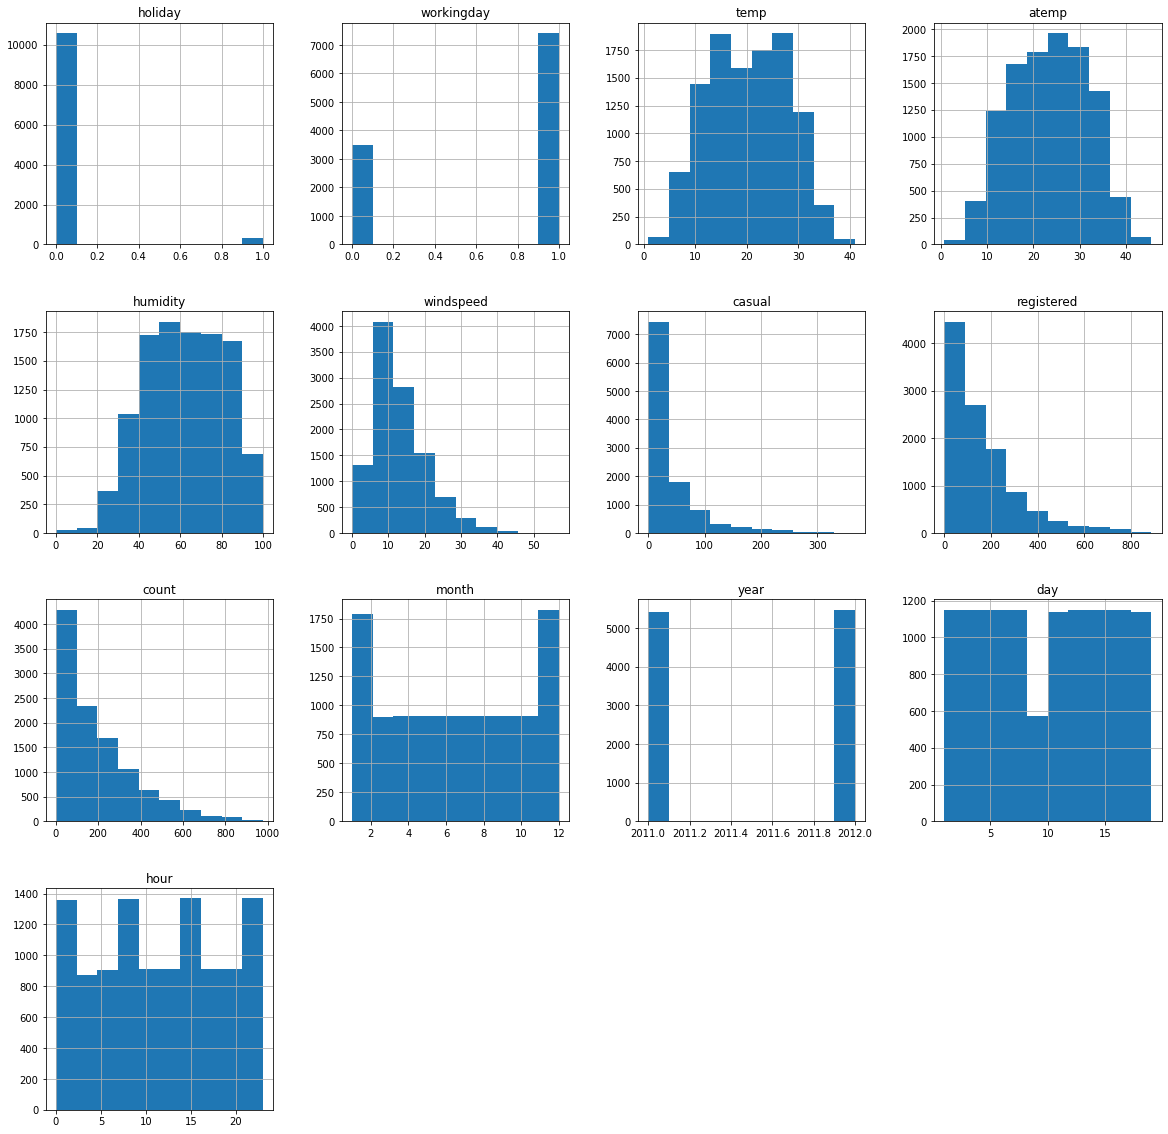

In [52]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(20,20))

## Step 5: Rerun the model with the same settings as before, just with more features

In [53]:

predictor_new_features = TabularPredictor(learner_kwargs = learner_kwargs ,label="count").fit( train_data=train,time_limit=600,presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20220102_184001/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220102_184001/"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 15
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11300.71 MB
	Train Data (Original)  Memory Usage: 0.98 MB (0.0% of avail

[1000]	train_set's rmse: 30.8941	valid_set's rmse: 37.9568
[2000]	train_set's rmse: 25.5626	valid_set's rmse: 36.2326
[3000]	train_set's rmse: 22.7303	valid_set's rmse: 35.8797
[4000]	train_set's rmse: 20.6991	valid_set's rmse: 35.7311


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.362	valid_set's rmse: 41.8008
[2000]	train_set's rmse: 25.531	valid_set's rmse: 39.7048
[3000]	train_set's rmse: 22.8456	valid_set's rmse: 38.8317
[4000]	train_set's rmse: 20.9282	valid_set's rmse: 38.4514
[5000]	train_set's rmse: 19.4151	valid_set's rmse: 38.226
[6000]	train_set's rmse: 18.1687	valid_set's rmse: 38.041
[7000]	train_set's rmse: 17.0924	valid_set's rmse: 38.0004
[8000]	train_set's rmse: 16.163	valid_set's rmse: 37.9676
[9000]	train_set's rmse: 15.3568	valid_set's rmse: 37.9355
[10000]	train_set's rmse: 14.6406	valid_set's rmse: 37.9066


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.8236	valid_set's rmse: 35.8718
[2000]	train_set's rmse: 25.8299	valid_set's rmse: 34.6527
[3000]	train_set's rmse: 23.0055	valid_set's rmse: 34.4218


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.4876	valid_set's rmse: 41.3501
[2000]	train_set's rmse: 25.2608	valid_set's rmse: 39.5116
[3000]	train_set's rmse: 22.524	valid_set's rmse: 38.8803
[4000]	train_set's rmse: 20.6481	valid_set's rmse: 38.4956
[5000]	train_set's rmse: 19.1398	valid_set's rmse: 38.2493
[6000]	train_set's rmse: 17.9363	valid_set's rmse: 38.0398
[7000]	train_set's rmse: 16.9125	valid_set's rmse: 37.8736
[8000]	train_set's rmse: 16.037	valid_set's rmse: 37.7728
[9000]	train_set's rmse: 15.2689	valid_set's rmse: 37.7225
[10000]	train_set's rmse: 14.5558	valid_set's rmse: 37.6688


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.8642	valid_set's rmse: 38.3607
[2000]	train_set's rmse: 25.5872	valid_set's rmse: 36.6838
[3000]	train_set's rmse: 22.8059	valid_set's rmse: 36.6004


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.0971	valid_set's rmse: 41.4237
[2000]	train_set's rmse: 25.1578	valid_set's rmse: 40.5021
[3000]	train_set's rmse: 22.4053	valid_set's rmse: 40.3277
[4000]	train_set's rmse: 20.469	valid_set's rmse: 40.3418


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.8575	valid_set's rmse: 39.0096
[2000]	train_set's rmse: 25.7644	valid_set's rmse: 36.1354
[3000]	train_set's rmse: 22.9004	valid_set's rmse: 35.3737
[4000]	train_set's rmse: 20.995	valid_set's rmse: 35.0287
[5000]	train_set's rmse: 19.4431	valid_set's rmse: 34.9194
[6000]	train_set's rmse: 18.1744	valid_set's rmse: 34.8901
[7000]	train_set's rmse: 17.0783	valid_set's rmse: 34.9096


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.3733	valid_set's rmse: 39.5325
[2000]	train_set's rmse: 25.29	valid_set's rmse: 38.0053
[3000]	train_set's rmse: 22.5542	valid_set's rmse: 37.6256
[4000]	train_set's rmse: 20.6715	valid_set's rmse: 37.4396
[5000]	train_set's rmse: 19.2121	valid_set's rmse: 37.2607
[6000]	train_set's rmse: 18.0124	valid_set's rmse: 37.1871
[7000]	train_set's rmse: 17.0041	valid_set's rmse: 37.1934
[8000]	train_set's rmse: 16.0973	valid_set's rmse: 37.1552
[9000]	train_set's rmse: 15.3377	valid_set's rmse: 37.1147
[10000]	train_set's rmse: 14.5766	valid_set's rmse: 37.1249


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.4128	valid_set's rmse: 41.2778
[2000]	train_set's rmse: 25.2484	valid_set's rmse: 40.2444
[3000]	train_set's rmse: 22.5731	valid_set's rmse: 40.178
[4000]	train_set's rmse: 20.6733	valid_set's rmse: 40.1187


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.8702	valid_set's rmse: 37.3327
[2000]	train_set's rmse: 25.9065	valid_set's rmse: 35.3623
[3000]	train_set's rmse: 23.1714	valid_set's rmse: 34.7819
[4000]	train_set's rmse: 21.2576	valid_set's rmse: 34.5147
[5000]	train_set's rmse: 19.709	valid_set's rmse: 34.3776
[6000]	train_set's rmse: 18.4052	valid_set's rmse: 34.2983
[7000]	train_set's rmse: 17.3427	valid_set's rmse: 34.264
[8000]	train_set's rmse: 16.4066	valid_set's rmse: 34.2927


	-36.9288	 = Validation score   (root_mean_squared_error)
	88.14s	 = Training   runtime
	6.38s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 292.95s of the 492.97s of remaining time.
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.1363	valid_set's rmse: 35.556
[2000]	train_set's rmse: 15.5229	valid_set's rmse: 35.4489


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.0431	valid_set's rmse: 36.9388
[2000]	train_set's rmse: 15.5393	valid_set's rmse: 36.1223
[3000]	train_set's rmse: 12.2068	valid_set's rmse: 35.9677
[4000]	train_set's rmse: 9.97753	valid_set's rmse: 35.9639


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.4253	valid_set's rmse: 33.0295


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.4591	valid_set's rmse: 38.0987
[2000]	train_set's rmse: 15.6967	valid_set's rmse: 37.1129
[3000]	train_set's rmse: 12.2044	valid_set's rmse: 36.7212
[4000]	train_set's rmse: 9.95476	valid_set's rmse: 36.6786


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.43	valid_set's rmse: 37.371
[2000]	train_set's rmse: 15.5136	valid_set's rmse: 36.986


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.6619	valid_set's rmse: 35.9541


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.0051	valid_set's rmse: 35.6024
[2000]	train_set's rmse: 15.4015	valid_set's rmse: 34.9824


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.3287	valid_set's rmse: 36.3245
[2000]	train_set's rmse: 15.6834	valid_set's rmse: 35.8282
[3000]	train_set's rmse: 12.2992	valid_set's rmse: 35.5694
[4000]	train_set's rmse: 10.1773	valid_set's rmse: 35.5318


	-36.5863	 = Validation score   (root_mean_squared_error)
	32.28s	 = Training   runtime
	1.57s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 255.17s of the 455.19s of remaining time.
	-41.3364	 = Validation score   (root_mean_squared_error)
	11.15s	 = Training   runtime
	0.48s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 242.67s of the 442.69s of remaining time.
	Time limit exceeded... Skipping CatBoost_BAG_L1.
Fitting model: ExtraTreesMSE_BAG_L1 ... Training model for up to 215.8s of the 415.83s of remaining time.
	-41.0441	 = Validation score   (root_mean_squared_error)
	4.45s	 = Training   runtime
	0.46s	 = Validation runtime
Fitting model: NeuralNetFastAI_BAG_L1 ... Training model for up to 210.12s of the 410.15s of remaining time.
	-46.4331	 = Validation score   (root_mean_squared_error)
	127.23s	 = Training   runtime
	0.38s	 = Validation runtime
Fitting model: XGBoost_BAG_L1 ... Training model for up 

In [54]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -35.177782      13.408806  490.600142                0.000641           0.344390            3       True         18
1      WeightedEnsemble_L2  -35.188062       9.162389  291.793307                0.000641           0.415823            2       True         10
2          CatBoost_BAG_L2  -35.496477      12.319634  377.991792                0.062426          39.247434            2       True         14
3          LightGBM_BAG_L2  -35.720065      12.388250  346.378619                0.131043           7.634260            2       True         12
4     ExtraTreesMSE_BAG_L2  -35.747418      12.802943  346.901023                0.545736           8.156664            2       True         15
5   NeuralNetFastAI_BAG_L2  -35.860603      12.668961  435.217394         

{'leaderboard':                      model   score_val  ...  can_infer  fit_order
 0      WeightedEnsemble_L3  -35.177782  ...       True         18
 1      WeightedEnsemble_L2  -35.188062  ...       True         10
 2          CatBoost_BAG_L2  -35.496477  ...       True         14
 3          LightGBM_BAG_L2  -35.720065  ...       True         12
 4     ExtraTreesMSE_BAG_L2  -35.747418  ...       True         15
 5   NeuralNetFastAI_BAG_L2  -35.860603  ...       True         16
 6        LightGBMXT_BAG_L2  -36.173298  ...       True         11
 7   RandomForestMSE_BAG_L2  -36.321671  ...       True         13
 8          LightGBM_BAG_L1  -36.586278  ...       True          4
 9        LightGBMXT_BAG_L1  -36.928823  ...       True          3
 10          XGBoost_BAG_L1  -37.413155  ...       True          8
 11          XGBoost_BAG_L2  -37.676338  ...       True         17
 12    ExtraTreesMSE_BAG_L1  -41.044143  ...       True          6
 13  RandomForestMSE_BAG_L1  -41.336398  ...   

In [55]:
predictions_new_features_test = predictor_new_features.predict(test)

In [56]:
predictions_new_features_test.head()

0    13.497177
1     5.365998
2     3.962563
3     4.175064
4     4.422746
Name: count, dtype: float32

In [58]:
# Remember to set all negative values to zero
predictions_new_features_test[ predictions_new_features_test < 0 ] = 0

In [59]:
# Same submitting predictions
#data = {"count":[1,2,3,4]}
#submission_new_features = pd.DataFrame(data)
submission["count"] = predictions_new_features_test
submission.to_csv("submission.csv", index=False)

In [60]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "new features"

100% 188k/188k [00:00<00:00, 373kB/s]
Successfully submitted to Bike Sharing Demand

In [61]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                      date                 description                        status    publicScore  privateScore  
----------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv                2022-01-02 18:55:16  new features                       complete  0.46954      0.46954       
submission.csv                2022-01-02 18:36:58  first raw submission               complete  1.39212      1.39212       
submission.csv                2022-01-01 17:21:56  new features with hyperparameters  complete  0.52224      0.52224       


#### New Score of 0.46954`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [83]:
import autogluon.core as ag

nn_options = {  # specifies non-default hyperparameter values for neural network models
    'num_epochs': 5,  # number of training epochs (controls training time of NN models)
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
    'layers': ag.space.Categorical([100], [1000], [200, 100], [300, 200, 100]),  # each choice for categorical hyperparameter 'layers' corresponds to list of sizes for each NN layer to use
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
}

gbm_options = { 
    'num_boost_round': 50, 
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36)}

ignored_columns = ["casual", "registered"]
hyperparameters = {  
                   'GBM': gbm_options,
                   'NN': nn_options , 
                  }  

time_limit = 2*60 
num_trials = 3 
search_strategy = 'auto'  

hyperparameter_tune_kwargs = {  
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}
predictor_new_hpo = TabularPredictor(learner_kwargs = learner_kwargs ,label="count").fit( train_data=train, time_limit=time_limit, hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,presets="best_quality", verbosity=3,num_bag_folds=7)

No path specified. Models will be saved in: "AutogluonModels/ag-20220102_202235/"
Presets specified: ['best_quality']
============ fit kwarg info ============
User Specified kwargs:
{'auto_stack': True,
 'hyperparameter_tune_kwargs': {'num_trials': 3,
                                'scheduler': 'local',
                                'searcher': 'auto'},
 'num_bag_folds': 7,
 'verbosity': 3}
Full kwargs:
{'_feature_generator_kwargs': None,
 '_save_bag_folds': None,
 'ag_args': None,
 'ag_args_ensemble': None,
 'ag_args_fit': None,
 'auto_stack': True,
 'excluded_model_types': None,
 'feature_generator': 'auto',
 'holdout_frac': None,
 'hyperparameter_tune_kwargs': {'num_trials': 3,
                                'scheduler': 'local',
                                'searcher': 'auto'},
 'keep_only_best': False,
 'num_bag_folds': 7,
 'num_bag_sets': None,
 'num_stack_levels': None,
 'quantile_levels': None,
 'refit_full': False,
 'save_space': False,
 'set_best_to_refit_full': False,

  0%|          | 0/3 [00:00<?, ?it/s]

Loading: AutogluonModels/ag-20220102_202235/models/LightGBM_BAG_L1/hpo/dataset_val.pkl
	Fitting LightGBM/T0 with 'num_gpus': 0, 'num_cpus': 2
Training Gradient Boosting Model for 50 rounds...
with the following hyperparameter settings:
{'num_threads': 2, 'learning_rate': 0.05, 'objective': 'regression', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 36, 'feature_fraction': 1.0, 'min_data_in_leaf': 20, 'seed_value': None}
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
Saving AutogluonModels/ag-20220102_202235/models/LightGBM_BAG_L1/hpo/LightGBM/T0/model.pkl
Loading: AutogluonModels/ag-20220102_202235/models/LightGBM_BAG_L1/hpo/dataset_val.pkl
	Fitting LightGBM/T1 with 'n

  0%|          | 0/3 [00:00<?, ?it/s]

Loading: AutogluonModels/ag-20220102_202235/models/NeuralNetMXNet_BAG_L1/hpo/train_tabNNdataset.pkl
Loading: AutogluonModels/ag-20220102_202235/models/NeuralNetMXNet_BAG_L1/hpo/validation_tabNNdataset.pkl
	Fitting NeuralNetMXNet/T0 with 'num_gpus': 0, 'num_cpus': 2
Training data for neural network has: 9330 examples, 13 features (11 vector, 2 embedding, 0 language)
Training neural network for up to 5 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 116, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=None)
        (1): Dropout(p = 0.1, axes=())
        (2): Dense(None -> 100, A

[50]	train_set's rmse: 50.0931	valid_set's rmse: 52.246


with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'regression', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 36}
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	Fitting S1F4 with 'num_gpus': 0, 'num_cpus': 2
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
Training Gradient Boosting Model for 50 rounds...


[50]	train_set's rmse: 49.8673	valid_set's rmse: 54.1507


with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'regression', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 36}
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	Fitting S1F5 with 'num_gpus': 0, 'num_cpus': 2
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.


[50]	train_set's rmse: 49.6331	valid_set's rmse: 54.116


Training Gradient Boosting Model for 50 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'regression', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 36}
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	Fitting S1F6 with 'num_gpus': 0, 'num_cpus': 2
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.


[50]	train_set's rmse: 50.5951	valid_set's rmse: 53.9177


Training Gradient Boosting Model for 50 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'regression', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 36}
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	Fitting S1F7 with 'num_gpus': 0, 'num_cpus': 2
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.


[50]	train_set's rmse: 50.1607	valid_set's rmse: 54.1293


Training Gradient Boosting Model for 50 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'regression', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 36}
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
Saving AutogluonModels/ag-20220102_202235/models/LightGBM_BAG_L1/T0/utils/oof.pkl
Saving AutogluonModels/ag-20220102_202235/models/LightGBM_BAG_L1/T0/model.pkl
	-53.1771	 = Validation score   (root_mean_squared_error)
	2.25s	 = Training   runtime
	0.08s	 = Validation runtime
Saving AutogluonModels/ag-20220102_202235/models/trainer.pkl
Loading: AutogluonModels/ag-20220102_202235/models/LightGBM_BAG_L1/T1/model.pkl

[50]	train_set's rmse: 50.5067	valid_set's rmse: 52.368


Training Gradient Boosting Model for 50 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'regression', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 36}
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	Fitting S1F3 with 'num_gpus': 0, 'num_cpus': 2
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.


[50]	train_set's rmse: 50.0931	valid_set's rmse: 52.246


Training Gradient Boosting Model for 50 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'regression', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 36}
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	Fitting S1F4 with 'num_gpus': 0, 'num_cpus': 2
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.


[50]	train_set's rmse: 49.8673	valid_set's rmse: 54.1507


Training Gradient Boosting Model for 50 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'regression', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 36}
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	Fitting S1F5 with 'num_gpus': 0, 'num_cpus': 2
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
Training Gradient Boosting Model for 50 rounds...


[50]	train_set's rmse: 49.6331	valid_set's rmse: 54.116


with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'regression', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 36}
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	Fitting S1F6 with 'num_gpus': 0, 'num_cpus': 2
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.


[50]	train_set's rmse: 50.5951	valid_set's rmse: 53.9177


Training Gradient Boosting Model for 50 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'regression', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 36}
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	Fitting S1F7 with 'num_gpus': 0, 'num_cpus': 2
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
Training Gradient Boosting Model for 50 rounds...


[50]	train_set's rmse: 50.1607	valid_set's rmse: 54.1293


with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'regression', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 36}
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
Saving AutogluonModels/ag-20220102_202235/models/LightGBM_BAG_L1/T1/utils/oof.pkl
Saving AutogluonModels/ag-20220102_202235/models/LightGBM_BAG_L1/T1/model.pkl
	-63.8848	 = Validation score   (root_mean_squared_error)
	2.14s	 = Training   runtime
	0.08s	 = Validation runtime
Saving AutogluonModels/ag-20220102_202235/models/trainer.pkl
Loading: AutogluonModels/ag-20220102_202235/models/LightGBM_BAG_L1/T2/model.pkl
Fitting model: LightGBM_BAG_L1/T2 ... Training mo

[50]	train_set's rmse: 50.5067	valid_set's rmse: 52.368


Training Gradient Boosting Model for 50 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'regression', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 36}
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	Fitting S1F3 with 'num_gpus': 0, 'num_cpus': 2
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.


[50]	train_set's rmse: 50.0931	valid_set's rmse: 52.246


Training Gradient Boosting Model for 50 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'regression', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 36}
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	Fitting S1F4 with 'num_gpus': 0, 'num_cpus': 2
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.


[50]	train_set's rmse: 49.8673	valid_set's rmse: 54.1507


Training Gradient Boosting Model for 50 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'regression', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 36}
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	Fitting S1F5 with 'num_gpus': 0, 'num_cpus': 2
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
Training Gradient Boosting Model for 50 rounds...


[50]	train_set's rmse: 49.6331	valid_set's rmse: 54.116


with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'regression', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 36}
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	Fitting S1F6 with 'num_gpus': 0, 'num_cpus': 2
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.


[50]	train_set's rmse: 50.5951	valid_set's rmse: 53.9177


Training Gradient Boosting Model for 50 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'regression', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 36}
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	Fitting S1F7 with 'num_gpus': 0, 'num_cpus': 2
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
Training Gradient Boosting Model for 50 rounds...


[50]	train_set's rmse: 50.1607	valid_set's rmse: 54.1293


with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'regression', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 36}
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
Saving AutogluonModels/ag-20220102_202235/models/LightGBM_BAG_L1/T2/utils/oof.pkl
Saving AutogluonModels/ag-20220102_202235/models/LightGBM_BAG_L1/T2/model.pkl
	-60.58	 = Validation score   (root_mean_squared_error)
	2.16s	 = Training   runtime
	0.08s	 = Validation runtime
Saving AutogluonModels/ag-20220102_202235/models/trainer.pkl
Loading: AutogluonModels/ag-20220102_202235/models/NeuralNetMXNet_BAG_L1/T0/model.pkl
Fitting model: NeuralNetMXNet_BAG_L1/T0 ... T

[50]	train_set's rmse: 50.5067	valid_set's rmse: 52.368


Training data for neural network has: 9331 examples, 13 features (11 vector, 2 embedding, 0 language)
Training neural network for up to 5 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 116, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=None)
        (1): Dropout(p = 0.1, axes=())
        (2): Dense(None -> 100, Activation(relu))
        (3): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=None)
        (4): Dropout(p = 0.1, axes=())
        (5): Dense(None -> 1, linear)
      )
    )
    (wide): Dense(None -> 1, linear)
  )
)


  0%|          | 0/3 [00:00<?, ?it/s]

Loading: AutogluonModels/ag-20220102_202235/models/LightGBM_BAG_L2/hpo/dataset_val.pkl
	Fitting LightGBM/T0 with 'num_gpus': 0, 'num_cpus': 2
Training Gradient Boosting Model for 50 rounds...
with the following hyperparameter settings:
{'num_threads': 2, 'learning_rate': 0.05, 'objective': 'regression', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 36, 'feature_fraction': 1.0, 'min_data_in_leaf': 20, 'seed_value': None}
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
Saving AutogluonModels/ag-20220102_202235/models/LightGBM_BAG_L2/hpo/LightGBM/T0/model.pkl
Loading: AutogluonModels/ag-20220102_202235/models/LightGBM_BAG_L2/hpo/dataset_val.pkl
	Fitting LightGBM/T1 with 'n

  0%|          | 0/3 [00:00<?, ?it/s]

Loading: AutogluonModels/ag-20220102_202235/models/NeuralNetMXNet_BAG_L2/hpo/train_tabNNdataset.pkl
Loading: AutogluonModels/ag-20220102_202235/models/NeuralNetMXNet_BAG_L2/hpo/validation_tabNNdataset.pkl
	Fitting NeuralNetMXNet/T0 with 'num_gpus': 0, 'num_cpus': 2
Training data for neural network has: 9330 examples, 17 features (15 vector, 2 embedding, 0 language)
Training neural network for up to 5 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 127, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=None)
        (1): Dropout(p = 0.1, axes=())
        (2): Dense(None -> 100, A

[50]	train_set's rmse: 44.7701	valid_set's rmse: 46.4509


with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'regression', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 36}
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	Fitting S1F4 with 'num_gpus': 0, 'num_cpus': 2
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.


[50]	train_set's rmse: 44.7585	valid_set's rmse: 46.1867


Training Gradient Boosting Model for 50 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'regression', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 36}
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	Fitting S1F5 with 'num_gpus': 0, 'num_cpus': 2
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.


[50]	train_set's rmse: 44.5717	valid_set's rmse: 46.3323


Training Gradient Boosting Model for 50 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'regression', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 36}
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	Fitting S1F6 with 'num_gpus': 0, 'num_cpus': 2
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.


[50]	train_set's rmse: 44.4851	valid_set's rmse: 47.3267


Training Gradient Boosting Model for 50 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'regression', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 36}
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	Fitting S1F7 with 'num_gpus': 0, 'num_cpus': 2
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.


[50]	train_set's rmse: 44.0945	valid_set's rmse: 49.0627


Training Gradient Boosting Model for 50 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'regression', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 36}
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
Saving AutogluonModels/ag-20220102_202235/models/LightGBM_BAG_L2/T0/utils/oof.pkl
Saving AutogluonModels/ag-20220102_202235/models/LightGBM_BAG_L2/T0/model.pkl
	-47.8267	 = Validation score   (root_mean_squared_error)
	2.45s	 = Training   runtime
	0.08s	 = Validation runtime
Saving AutogluonModels/ag-20220102_202235/models/trainer.pkl
Loading: AutogluonModels/ag-20220102_202235/models/LightGBM_BAG_L2/T1/model.pkl

[50]	train_set's rmse: 44.3866	valid_set's rmse: 48.5409


Training Gradient Boosting Model for 50 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'regression', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 36}
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	Fitting S1F3 with 'num_gpus': 0, 'num_cpus': 2
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.


[50]	train_set's rmse: 44.7701	valid_set's rmse: 46.4509


Training Gradient Boosting Model for 50 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'regression', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 36}
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	Fitting S1F4 with 'num_gpus': 0, 'num_cpus': 2
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.


[50]	train_set's rmse: 44.7585	valid_set's rmse: 46.1867


Training Gradient Boosting Model for 50 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'regression', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 36}
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	Fitting S1F5 with 'num_gpus': 0, 'num_cpus': 2
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.


[50]	train_set's rmse: 44.5717	valid_set's rmse: 46.3323


Training Gradient Boosting Model for 50 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'regression', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 36}
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	Fitting S1F6 with 'num_gpus': 0, 'num_cpus': 2
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.


[50]	train_set's rmse: 44.4851	valid_set's rmse: 47.3267


Training Gradient Boosting Model for 50 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'regression', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 36}
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	Fitting S1F7 with 'num_gpus': 0, 'num_cpus': 2
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.


[50]	train_set's rmse: 44.0945	valid_set's rmse: 49.0627


Training Gradient Boosting Model for 50 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'regression', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 36}
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
Saving AutogluonModels/ag-20220102_202235/models/LightGBM_BAG_L2/T1/utils/oof.pkl
Saving AutogluonModels/ag-20220102_202235/models/LightGBM_BAG_L2/T1/model.pkl
	-57.6448	 = Validation score   (root_mean_squared_error)
	2.41s	 = Training   runtime
	0.08s	 = Validation runtime
Saving AutogluonModels/ag-20220102_202235/models/trainer.pkl
Loading: AutogluonModels/ag-20220102_202235/models/LightGBM_BAG_L2/T2/model.pkl

[50]	train_set's rmse: 44.3866	valid_set's rmse: 48.5409


Training Gradient Boosting Model for 50 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'regression', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 36}
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	Fitting S1F3 with 'num_gpus': 0, 'num_cpus': 2
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.


[50]	train_set's rmse: 44.7701	valid_set's rmse: 46.4509


Training Gradient Boosting Model for 50 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'regression', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 36}
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	Fitting S1F4 with 'num_gpus': 0, 'num_cpus': 2
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.
Training Gradient Boosting Model for 50 rounds...


[50]	train_set's rmse: 44.7585	valid_set's rmse: 46.1867


with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'regression', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 36}
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	Fitting S1F5 with 'num_gpus': 0, 'num_cpus': 2
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.


[50]	train_set's rmse: 44.5717	valid_set's rmse: 46.3323


Training Gradient Boosting Model for 50 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'regression', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 36}
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	Fitting S1F6 with 'num_gpus': 0, 'num_cpus': 2
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.


[50]	train_set's rmse: 44.4851	valid_set's rmse: 47.3267


Training Gradient Boosting Model for 50 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'regression', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 36}
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	Fitting S1F7 with 'num_gpus': 0, 'num_cpus': 2
Attempting to fit model without HPO, but search space is provided. fit() will only consider default hyperparameter values from search space.


[50]	train_set's rmse: 44.0945	valid_set's rmse: 49.0627


Training Gradient Boosting Model for 50 rounds...
with the following hyperparameter settings:
{'num_threads': -1, 'learning_rate': 0.05, 'objective': 'regression', 'verbose': -1, 'boosting_type': 'gbdt', 'two_round': True, 'num_leaves': 36}
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
Saving AutogluonModels/ag-20220102_202235/models/LightGBM_BAG_L2/T2/utils/oof.pkl
Saving AutogluonModels/ag-20220102_202235/models/LightGBM_BAG_L2/T2/model.pkl
	-53.2046	 = Validation score   (root_mean_squared_error)
	2.45s	 = Training   runtime
	0.08s	 = Validation runtime
Saving AutogluonModels/ag-20220102_202235/models/trainer.pkl
Loading: AutogluonModels/ag-20220102_202235/models/NeuralNetMXNet_BAG_L2/T0/mod

[50]	train_set's rmse: 44.3866	valid_set's rmse: 48.5409


Training data for neural network has: 9331 examples, 17 features (15 vector, 2 embedding, 0 language)
Training neural network for up to 5 epochs...
Neural network architecture:
EmbedNet(
  (numeric_block): NumericBlock(
    (body): Dense(None -> 127, Activation(relu))
  )
  (embed_blocks): HybridSequential(
    (0): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
    (1): EmbedBlock(
      (body): Embedding(5 -> 3, float32)
    )
  )
  (output_block): WideAndDeepBlock(
    (deep): FeedforwardBlock(
      (body): HybridSequential(
        (0): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=None)
        (1): Dropout(p = 0.1, axes=())
        (2): Dense(None -> 100, Activation(relu))
        (3): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=None)
        (4): Dropout(p = 0.1, axes=())
        (5): Dense(None -> 1, linear)
      )
    )
    (wide): Dense(None -> 1, linear)
  )
)


In [63]:
predictor_new_hpo.fit_summary()

Loading: AutogluonModels/ag-20220102_190107/models/LightGBM_BAG_L1/T0/model.pkl
Loading: AutogluonModels/ag-20220102_190107/models/LightGBM_BAG_L1/T1/model.pkl
Loading: AutogluonModels/ag-20220102_190107/models/LightGBM_BAG_L1/T2/model.pkl
Loading: AutogluonModels/ag-20220102_190107/models/NeuralNetMXNet_BAG_L1/T0/model.pkl
Loading: AutogluonModels/ag-20220102_190107/models/WeightedEnsemble_L2/model.pkl
Loading: AutogluonModels/ag-20220102_190107/models/LightGBM_BAG_L2/T0/model.pkl
Loading: AutogluonModels/ag-20220102_190107/models/LightGBM_BAG_L2/T1/model.pkl
Loading: AutogluonModels/ag-20220102_190107/models/LightGBM_BAG_L2/T2/model.pkl
Loading: AutogluonModels/ag-20220102_190107/models/NeuralNetMXNet_BAG_L2/T0/model.pkl
Loading: AutogluonModels/ag-20220102_190107/models/WeightedEnsemble_L3/model.pkl


*** Summary of fit() ***
Estimated performance of each model:
                      model   score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L3  -47.267106       3.458529  66.976664                0.001592           0.260864            3       True         10
1        LightGBM_BAG_L2/T0  -47.785322       1.862613  37.420684                0.078443           2.333434            2       True          6
2       WeightedEnsemble_L2  -53.079193       0.155934   4.432538                0.001071           0.259179            2       True          5
3        LightGBM_BAG_L1/T1  -53.082338       0.078399   2.080235                0.078399           2.080235            1       True          2
4        LightGBM_BAG_L2/T2  -53.097396       1.861562  37.411770                0.077392           2.324520            2       True          8
5        LightGBM_BAG_L1/T0  -53.177104       0.076464   2.093124         

{'leaderboard':                       model   score_val  ...  can_infer  fit_order
 0       WeightedEnsemble_L3  -47.267106  ...       True         10
 1        LightGBM_BAG_L2/T0  -47.785322  ...       True          6
 2       WeightedEnsemble_L2  -53.079193  ...       True          5
 3        LightGBM_BAG_L1/T1  -53.082338  ...       True          2
 4        LightGBM_BAG_L2/T2  -53.097396  ...       True          8
 5        LightGBM_BAG_L1/T0  -53.177104  ...       True          1
 6        LightGBM_BAG_L2/T1  -57.617295  ...       True          7
 7        LightGBM_BAG_L1/T2  -67.741918  ...       True          3
 8  NeuralNetMXNet_BAG_L2/T0 -113.918875  ...       True          9
 9  NeuralNetMXNet_BAG_L1/T0 -177.936516  ...       True          4
 
 [10 rows x 9 columns],
 'max_stack_level': 3,
 'model_best': 'WeightedEnsemble_L3',
 'model_fit_times': {'LightGBM_BAG_L1/T0': 2.0931243896484375,
  'LightGBM_BAG_L1/T1': 2.080235004425049,
  'LightGBM_BAG_L1/T2': 2.1148533821105957,


In [64]:
predictions_new_hpo_test = predictor_new_hpo.predict(test)
predictions_new_hpo_test = predictor_new_hpo.predict(train)

Loading: AutogluonModels/ag-20220102_190107/models/WeightedEnsemble_L3/model.pkl
Loading: AutogluonModels/ag-20220102_190107/models/LightGBM_BAG_L1/T0/model.pkl
Loading: AutogluonModels/ag-20220102_190107/models/LightGBM_BAG_L1/T1/model.pkl
Loading: AutogluonModels/ag-20220102_190107/models/LightGBM_BAG_L1/T2/model.pkl
Loading: AutogluonModels/ag-20220102_190107/models/NeuralNetMXNet_BAG_L1/T0/model.pkl
Loading: AutogluonModels/ag-20220102_190107/models/LightGBM_BAG_L2/T0/model.pkl
Loading: AutogluonModels/ag-20220102_190107/models/NeuralNetMXNet_BAG_L2/T0/model.pkl
Loading: AutogluonModels/ag-20220102_190107/models/WeightedEnsemble_L3/model.pkl
Loading: AutogluonModels/ag-20220102_190107/models/LightGBM_BAG_L1/T0/model.pkl
Loading: AutogluonModels/ag-20220102_190107/models/LightGBM_BAG_L1/T1/model.pkl
Loading: AutogluonModels/ag-20220102_190107/models/LightGBM_BAG_L1/T2/model.pkl
Loading: AutogluonModels/ag-20220102_190107/models/NeuralNetMXNet_BAG_L1/T0/model.pkl
Loading: AutogluonMo

In [65]:
# Remember to set all negative values to zero
predictions_new_hpo_test[ predictions_new_hpo_test < 0 ] = 0

In [66]:
# Same submitting predictions
submission["count"] = predictions_new_hpo_test
submission.to_csv("submission.csv", index=False)

In [67]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "new features with hyperparameters"

100% 188k/188k [00:00<00:00, 464kB/s]
Successfully submitted to Bike Sharing Demand

In [68]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                      date                 description                        status    publicScore  privateScore  
----------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv                2022-01-02 19:03:20  new features with hyperparameters  complete  1.65055      1.65055       
submission.csv                2022-01-02 18:55:16  new features                       complete  0.46954      0.46954       
submission.csv                2022-01-02 18:36:58  first raw submission               complete  1.39212      1.39212       


#### New Score of `1.65055`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

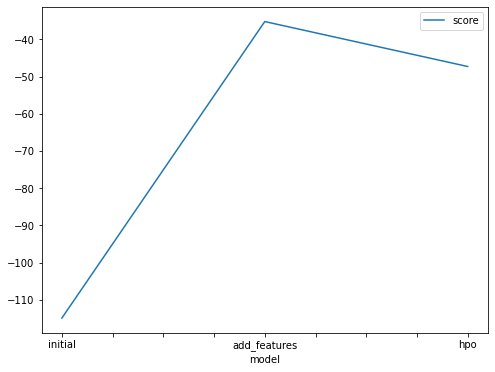

In [78]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-114.937170,-35.177782 ,-47.267106]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

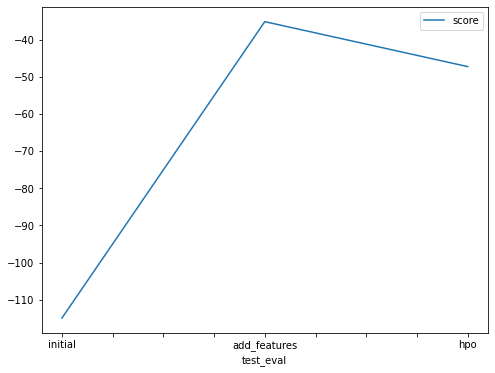

In [77]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [predictor.leaderboard(silent=True)['score_val'][0],
          predictor_new_features.leaderboard(silent=True)['score_val'][0],
          predictor_new_hpo.leaderboard(silent=True)['score_val'][0]  ]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [80]:
# The 3 hyperparameters we tuned with the kaggle score as the result
import pandas as pd
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "Time_limit": [600, 600, 2*60],
    "Verbosity": [2, 2, 3],
    "num_bag_folds": ['None', 'None', 7],
    "num_trials" :["Default","Default",3]
    "score":[predictor.leaderboard(silent=True)['score_val'][0],
          predictor_new_features.leaderboard(silent=True)['score_val'][0],
          predictor_new_hpo.leaderboard(silent=True)['score_val'][0]  ]
})

,model,Time_limit,Verbosity,num_bag_folds,score
0,initial,600,2,None,-114.937170
1,add_features,600,2,None,-35.177782
2,hpo,120,3,7,-47.267106
